#                            Exploratory data analysis (EDA) with Haberman's Survival


Brief introduction of Haberman's dataset :

    The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's 
    Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information :
    
    There are fours attributes

    1. Age of patient at time of operation (numerical)

    2. Patient's year of operation (year - 1900, numerical)

    3. Number of positive axillary nodes detected (numerical)

    4. Survival status (class attribute)

        1 = the patient survived 5 years or longer

        2 = the patient died within 5 year


In [1]:
import pandas as pd                          
import seaborn as sns                       
import matplotlib.pyplot as plt             
import numpy as np                         
%matplotlib inline 
# Columns name for haberman dataset

column_name = ['Age',
               'Year operation', 
               'Axillary nodes detected', 
               'Survival status'] 

# Load data set in pandas dataframe, get haberman.csv 
# from https://www.kaggle.com/gilsousa/haberman-s-survival

df = pd.read_csv("haberman.csv", names = column_name)

# it will print first five 5 sample of datasets

df.head()


,Age,Year operation,Axillary nodes detected,Survival status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [2]:
#(Q) How many samples and attributes in haberman dataset

print(df.shape)

(306, 4)


In [3]:
#(Q) What are column names in haberman dataset

print(df.columns)

Index(['Age', 'Year operation', 'Axillary nodes detected', 'Survival status'], dtype='object')


In [4]:
''' How many samples are presant for each class of survial status(1 represant who lived longer than 5 yrs and 2 is for who 
    lived less than 5 yrs)''' 

class_1, class_2 = df["Survival status"].value_counts()
print("Class 1 has {0} datasets \nClass 2 has {1} datasets".format(class_1, class_2))

# this dataset is imbalanced becuase 1 and 2 have different number of samples

Class 1 has 225 datasets 
Class 2 has 81 datasets


# 2-D scatter plot

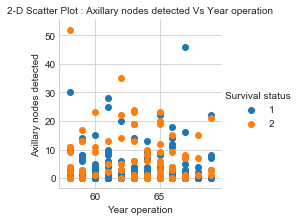

In [47]:
sns.set_style('whitegrid')
sns.FacetGrid(df, hue = 'Survival status', size = 3) \
   .map(plt.scatter, 'Year operation', 'Axillary nodes detected') \
   .add_legend()
plt.title("2-D Scatter Plot : Axillary nodes detected Vs Year operation", size = 10)
plt.show()    

Observation:
    * In this scatter plot, cancer patient and non cancer patients 
      are overlapping to each other. So it is very hard to sepearte classes

# Pair Plot

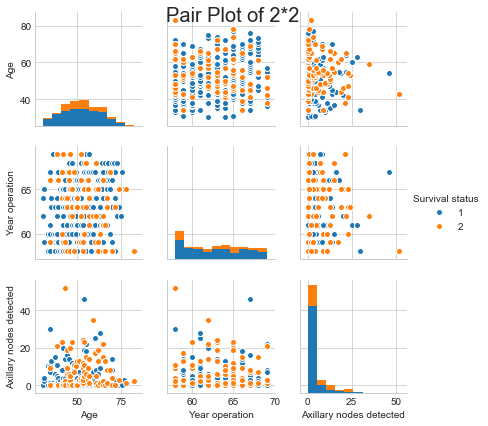

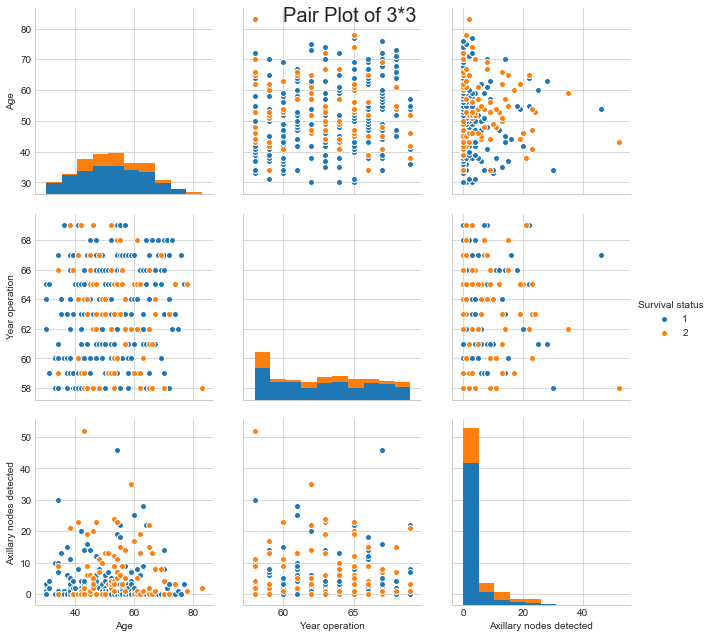

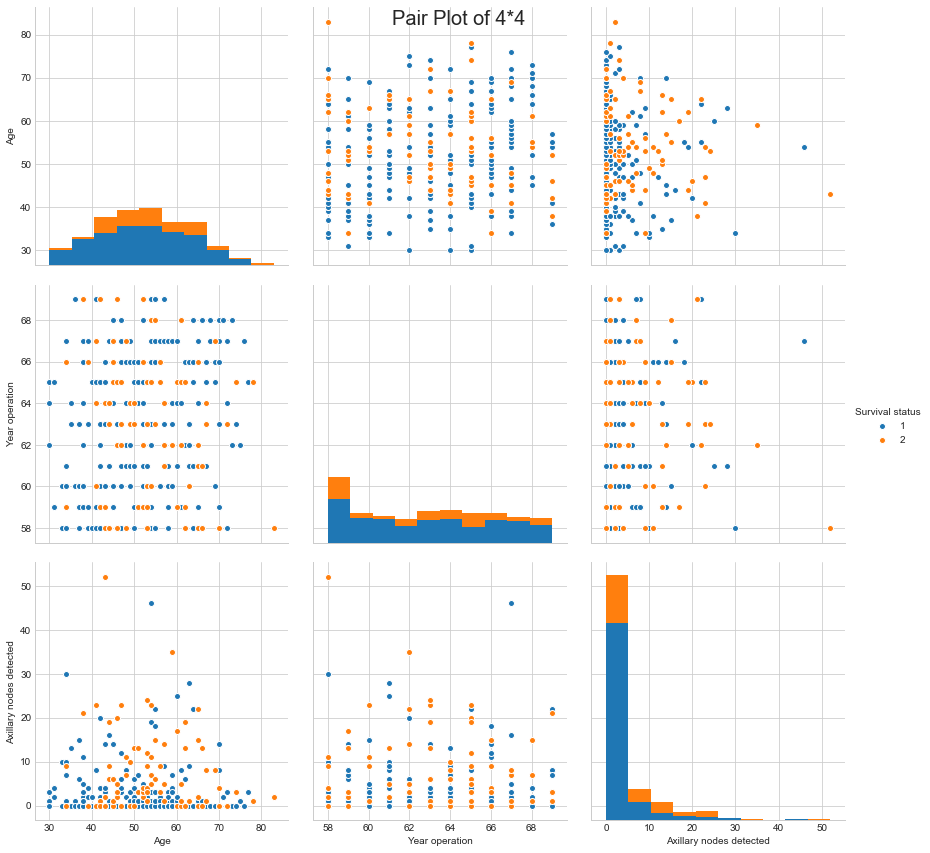

In [52]:
#pair plot can be shown by two attributes but won't work on 3-D or 4-D or higher
#pair plots can not work if there are a lot attribiutes
plt.close()

#Ploting 2*2 Grid

sns.set_style("whitegrid")
sns.pairplot(df, vars = ["Age", "Year operation", "Axillary nodes detected" ], \
             hue = "Survival status", size = 2)
plt.suptitle("Pair Plot of 2*2", size = 20)
plt.show()

#Ploting 3*3 Grid

sns.set_style("whitegrid")
sns.pairplot(df, vars = ["Age", "Year operation", "Axillary nodes detected" ], \
             hue = "Survival status", size = 3)
plt.suptitle("Pair Plot of 3*3", size = 20)
plt.show()

#Ploting 4*4 Grid

sns.set_style("whitegrid")
sns.pairplot(df, vars = ["Age", "Year operation", "Axillary nodes detected" ], \
             hue = "Survival status", size = 4)
plt.suptitle("Pair Plot of 4*4", size = 20)
plt.show()

Observation :
    * In this pair plot, no pair of attributes is useful to separate -
      breast cancer patients.

# Histogram

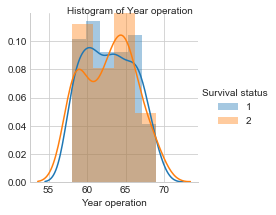

In [7]:
# ignoring warnings
import warnings
warnings.filterwarnings("ignore")

sns.FacetGrid(df, hue = "Survival status", size = 3) \
  .map(sns.distplot, "Year operation") \
  .add_legend()
plt.suptitle("Histogram of Year operation", size = 10)
plt.show()    


Observation :
    * As we can see, using year operation we cannot separate breat cancer 
      patients because both cancer patients and non cancer patients are 
      overlapping to each other.

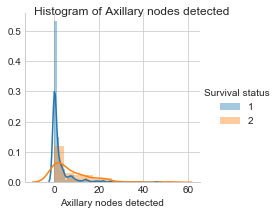

In [8]:
sns.FacetGrid(df, hue = "Survival status", size = 3) \
   .map(sns.distplot, "Axillary nodes detected") \
   .add_legend()
plt.suptitle("Histogram of Axillary nodes detected")
plt.show()

Observation: 
    * Axillary nodes detected attributes is also not able to separate 
      the breast cancer patients.Reason is overlapping to each other.

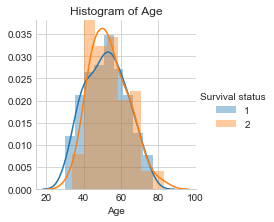

In [35]:
sns.FacetGrid(df, hue = "Survival status", size = 3) \
   .map(sns.distplot, 'Age')\
   .add_legend()
plt.title("Histogram of Age")
plt.show()

Observation:
    * Histogram of Age attributes is also not able to separate breast
      cancer patients.Reason is same as previous, Overlapping to each other.
    

# PDF and CDF graph

Axillary nodes detected :

pdf   [0.70915033 0.08496732 0.0751634  0.03594771 0.02941176 0.01960784
 0.02614379 0.00326797 0.00653595 0.         0.00326797 0.
 0.         0.00326797 0.00326797]
bin_edges   [ 0.          3.46666667  6.93333333 10.4        13.86666667 17.33333333
 20.8        24.26666667 27.73333333 31.2        34.66666667 38.13333333
 41.6        45.06666667 48.53333333 52.        ]


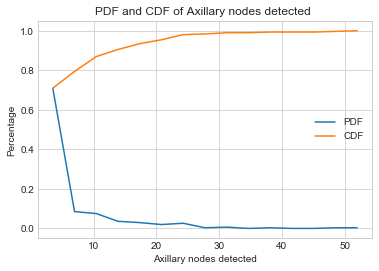

Year opreation :

pdf   [0.11764706 0.08823529 0.09150327 0.         0.08496732 0.0751634
 0.09803922 0.         0.10130719 0.09150327 0.09150327 0.
 0.08169935 0.04248366 0.03594771]
bin_edges   [58.         58.73333333 59.46666667 60.2        60.93333333 61.66666667
 62.4        63.13333333 63.86666667 64.6        65.33333333 66.06666667
 66.8        67.53333333 68.26666667 69.        ]


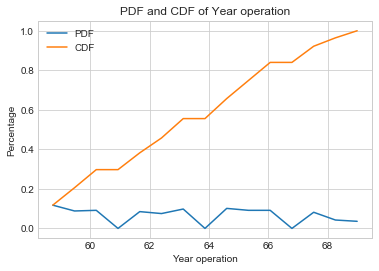

Age : 

pdf   [0.02287582 0.05555556 0.0620915  0.12091503 0.08823529 0.11437908
 0.12418301 0.11437908 0.0751634  0.09803922 0.04248366 0.05228758
 0.01633987 0.00980392 0.00326797]
bin_edges [30.         33.53333333 37.06666667 40.6        44.13333333 47.66666667
 51.2        54.73333333 58.26666667 61.8        65.33333333 68.86666667
 72.4        75.93333333 79.46666667 83.        ]


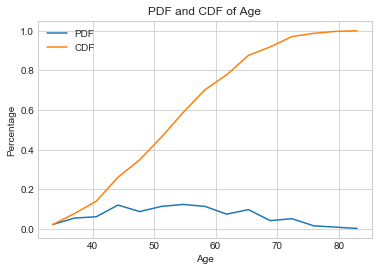

In [46]:
# PDF and CDF for Axillary nodes detected
print("Axillary nodes detected :\n")
counts, bin_edges = np.histogram(df["Axillary nodes detected"], bins = 15, density = True)
pdf = counts/(sum(counts))
print('pdf  ', pdf)
print('bin_edges  ',bin_edges)
cdf = np.cumsum(pdf)
plt.xlabel("Axillary nodes detected")
plt.ylabel("Percentage")
plt.plot(bin_edges[1:], pdf, label = "PDF")
plt.plot(bin_edges[1:], cdf, label = "CDF")
plt.title("PDF and CDF of Axillary nodes detected ")
plt.legend()
plt.show()

#PDF and CDF for Year operation
print("Year opreation :\n")
counts, bin_edges = np.histogram(df["Year operation"], bins = 15, density = True)
pdf = counts/(sum(counts))
print('pdf  ',pdf)
print('bin_edges  ',bin_edges)
cdf = np.cumsum(pdf)
plt.xlabel("Year operation")
plt.ylabel("Percentage")
plt.plot(bin_edges[1:], pdf, label = "PDF")
plt.plot(bin_edges[1:], cdf, label = "CDF")
plt.title("PDF and CDF of Year operation")
plt.legend()
plt.show()

#PDF and CDF for Age
print("Age : \n")
counts, bin_edges = np.histogram(df['Age'], bins = 15, density = True)
pdf = counts/(sum(counts))
print('pdf  ', pdf)
print('bin_edges', bin_edges)
cdf = np.cumsum(pdf)
plt.xlabel('Age')
plt.ylabel('Percentage')
plt.plot(bin_edges[1:], pdf, label = "PDF")
plt.plot(bin_edges[1:], cdf, label = "CDF")
plt.title("PDF and CDF of Age")
plt.legend()
plt.show()

# Mean, Median and Standard Deviation

In [11]:
print("Mean of Year operation: ", np.mean(df["Year operation"]) )
print("Median of Year operation: ", np.median(df["Year operation"]))
print("Means of Axillary nodes detected: ", np.mean(df["Axillary nodes detected"]))
print("Meadian of Axillary nodes detected: ", np.median(df["Axillary nodes detected"]))
print("Means of Age: ", np.mean(df["Age"]))
print("Median of Age: ", np.median(df["Age"]))

print("Std dev of Year operation:  ", np.std(df["Year operation"]))
print("Std dev of Axillary nodes detected: ", np.std(df["Axillary nodes detected"]) )
print("Std dev of Age: ", np.std(df["Age"]))

Mean of Year operation:  62.85294117647059
Median of Year operation:  63.0
Means of Axillary nodes detected:  4.026143790849673
Meadian of Axillary nodes detected:  1.0
Means of Age:  52.45751633986928
Median of Age:  52.0
Std dev of Year operation:   3.244090833563246
Std dev of Axillary nodes detected:  7.177896092811152
Std dev of Age:  10.78578520363183


Observation: 
    As we can see Mean and Median of all three attriburtes are almost equal
    excpet Axillary nodes detected.So Axillary nodes detected might have some 
    outlier

# Percentile, Quantile and  MAD

In [12]:
print("45 Percentile of Year operation: ", np.percentile(df["Age"], 45))
print("65 percentile of Axillary nodes detected", \
      np.percentile(df["Axillary nodes detected"], 65) )
print("26 percentile of Age: ", np.percentile(df["Age"], 26))

#Quantile 
print("Quantile of Year operation: ", \
      np.percentile(df["Year operation"],np.arange(0, 100, 25)))
print("Quantile of Axillary nodes detected: ", \
      np.percentile(df["Axillary nodes detected"], np.arange(0, 100, 25)))
print("Qunatile of Age: ", \
      np.percentile(df["Age"], np.arange(0, 100, 25)))
#MAD
from statsmodels import robust
print("MAD of Year operation: ", robust.mad(df["Year operation"]))
print("MAD of Axillary nodes detected: ", robust.mad(df["Axillary nodes detected"]))
print("MAD of Age: ", robust.mad(df["Age"]))

45 Percentile of Year operation:  51.0
65 percentile of Axillary nodes detected 3.0
26 percentile of Age:  44.3
Quantile of Year operation:  [58.   60.   63.   65.75]
Quantile of Axillary nodes detected:  [0. 0. 1. 4.]
Qunatile of Age:  [30.   44.   52.   60.75]
MAD of Year operation:  4.447806655516806
MAD of Axillary nodes detected:  1.482602218505602
MAD of Age:  11.860817748044816


# Box and Whisker Plot

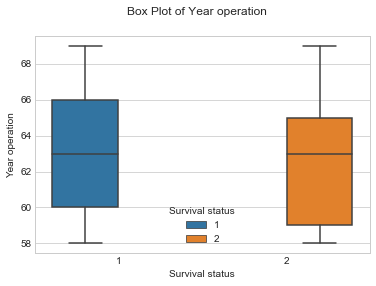

In [22]:
sns.boxplot(x = "Survival status", y = "Year operation", data = df, \
           hue = "Survival status")
plt.suptitle("Box Plot of Year operation")
plt.show()

Observation: 
    * In Survival status 1, median and 1st and 3rd quartile are ok. But in the
      survival status 2, median is little bit biased towards the 3rd quartile. 

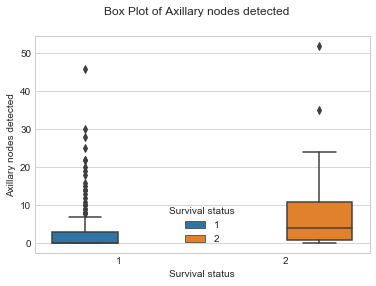

In [24]:
sns.boxplot(x = "Survival status", y = "Axillary nodes detected", data = df, \
           hue = "Survival status")
plt.suptitle("Box Plot of Axillary nodes detected")
plt.show()

Observation: 
    * In the survival status 1, There are many outliers which is lying 
      above than higher fence, In the survival status 2, we have 2 
      outliers lying beyond the higher fence.  

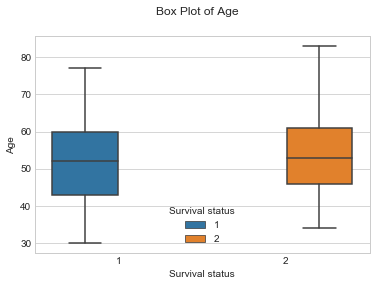

In [25]:
sns.boxplot(x = "Survival status", y = "Age", data = df, hue = "Survival status")
plt.suptitle("Box Plot of Age")
plt.show()

Observation:
    * In the Survival status 1 and 2, everthing looks fine like median,
      no outliers 
    

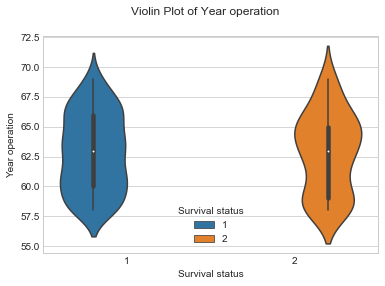

In [26]:
sns.violinplot(x = "Survival status", y = "Year operation", data = df, \
               hue = "Survival status")
plt.suptitle("Violin Plot of Year operation")
plt.show()

Observation:
    * In the survival status 1 and 2, many point lying outside the 
      higher and lower fence.And also violin plot show that pdf of
      Sample.  

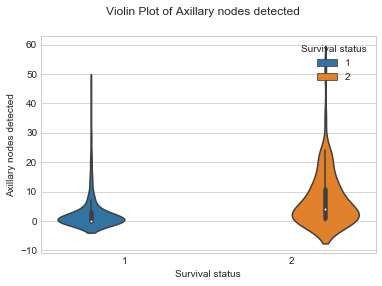

In [36]:
sns.violinplot(x = "Survival status", y = "Axillary nodes detected", data = df, \
              hue = "Survival status")
plt.suptitle("Violin Plot of Axillary nodes detected")
plt.show()

Observation:
    * In the survival status 1, distribution of sample looks similar
      to normal distribution.But In the survival status 2, it looks
      right skewed normal distribution.  
        
    
      

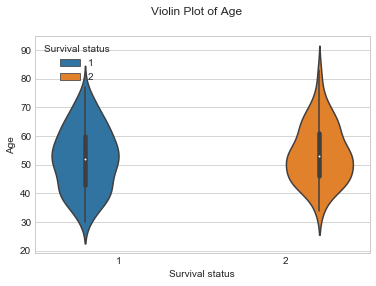

In [28]:
sns.violinplot(x = "Survival status", y = "Age", data = df, hue = "Survival status")
plt.suptitle("Violin Plot of Age")
plt.show()

Observation:
    * In the survival status 1, samples are distributed normally not
      perfectly, but in the case of survival staus 2, it looks little bit
      right skew normal distribution.

# Overall Observation:
    * We have plotted 2-d and pair plot but no pair of attributes 
      are useful to separate classes.
    * Then we moved to Histogram plot which is nothing but 1-D plot,
      was also not able to separate claases.
    * Then we plot PDF(Which is same as histogram) and CDF
    * Then we moved to Mean, median, percentile , Quantile. And saw that
      Axillary nodes detected has some outlier becuase mean and median 
      have large differece.
    * Then we plotted Box and Violin plot.And outlier of Axillary nodes-
      detected can be seen by plotting box an violin. 
      